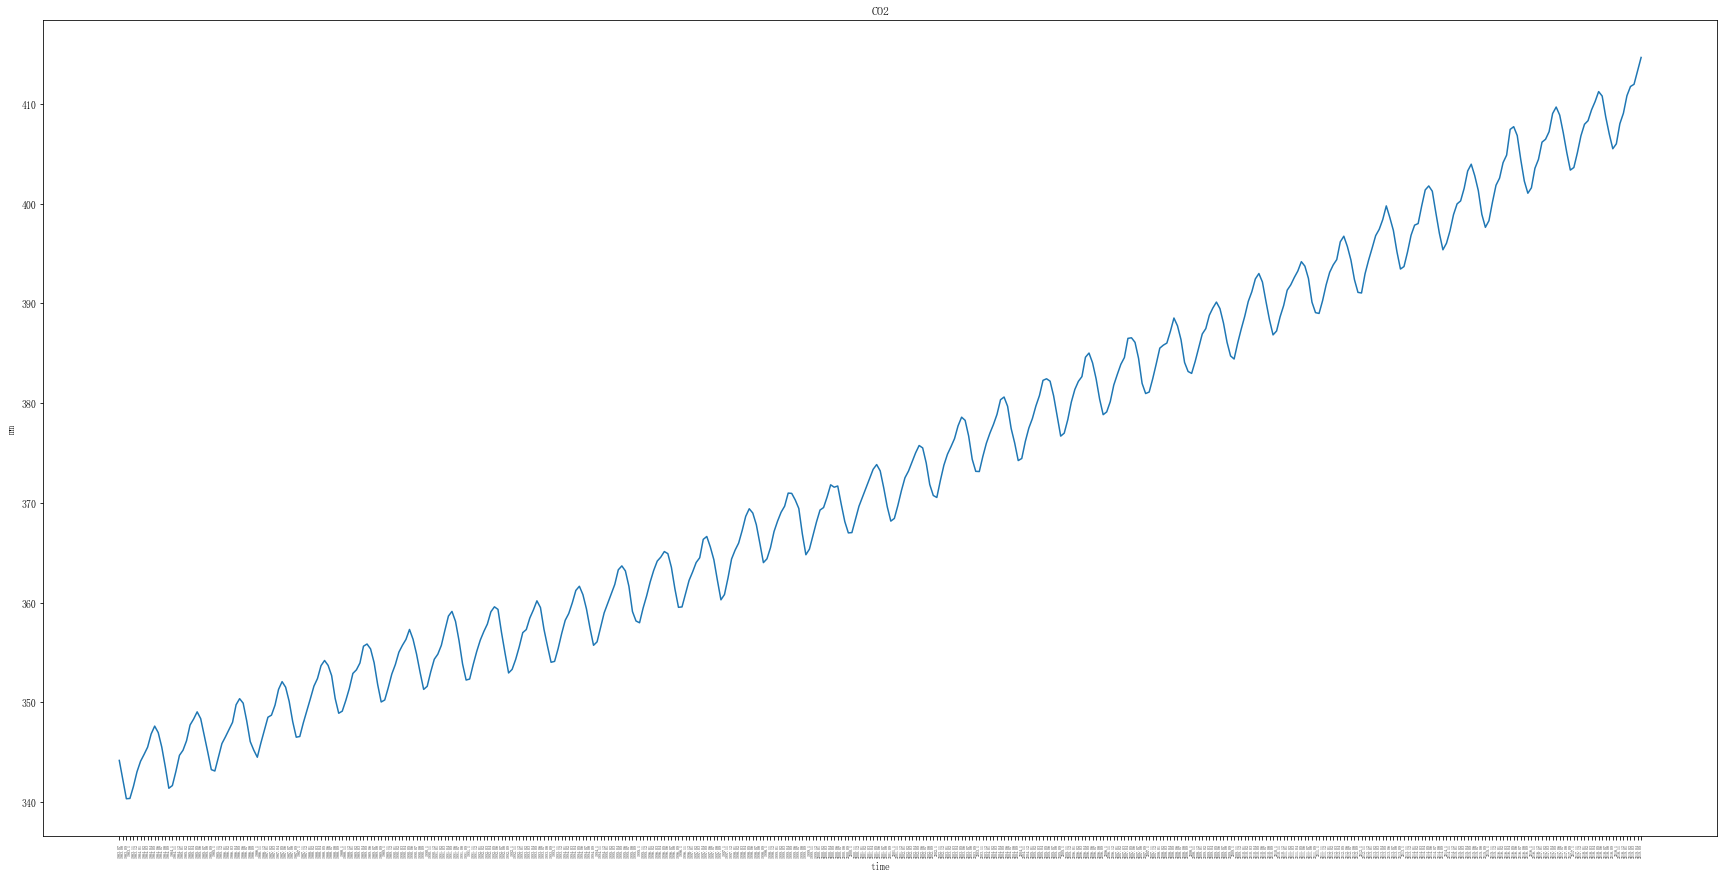

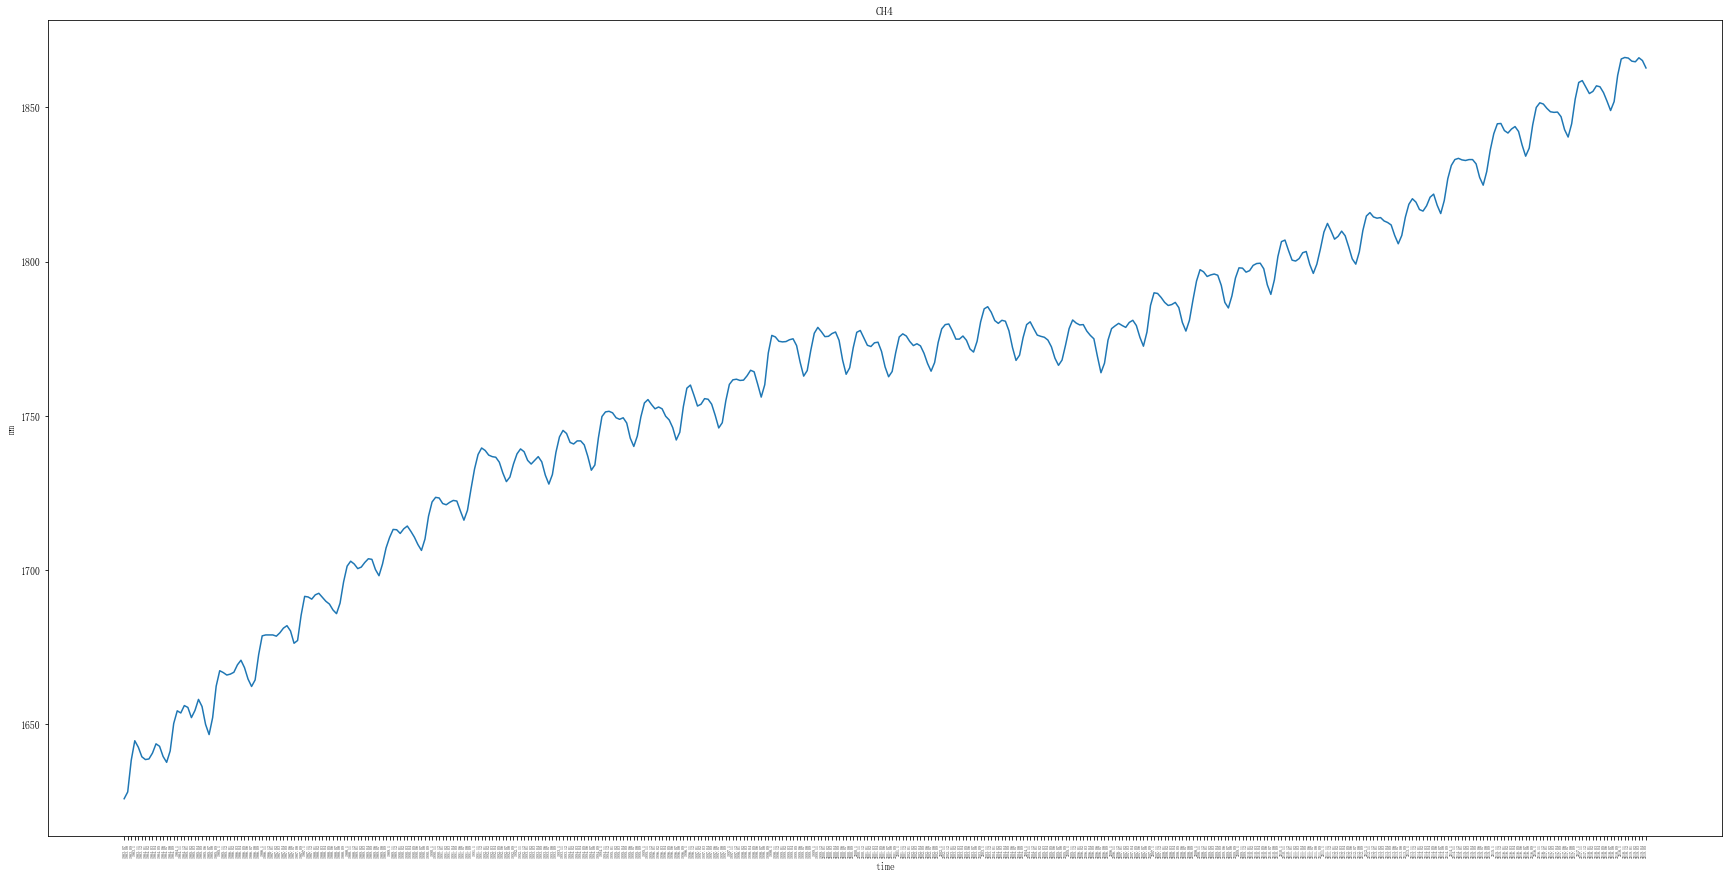

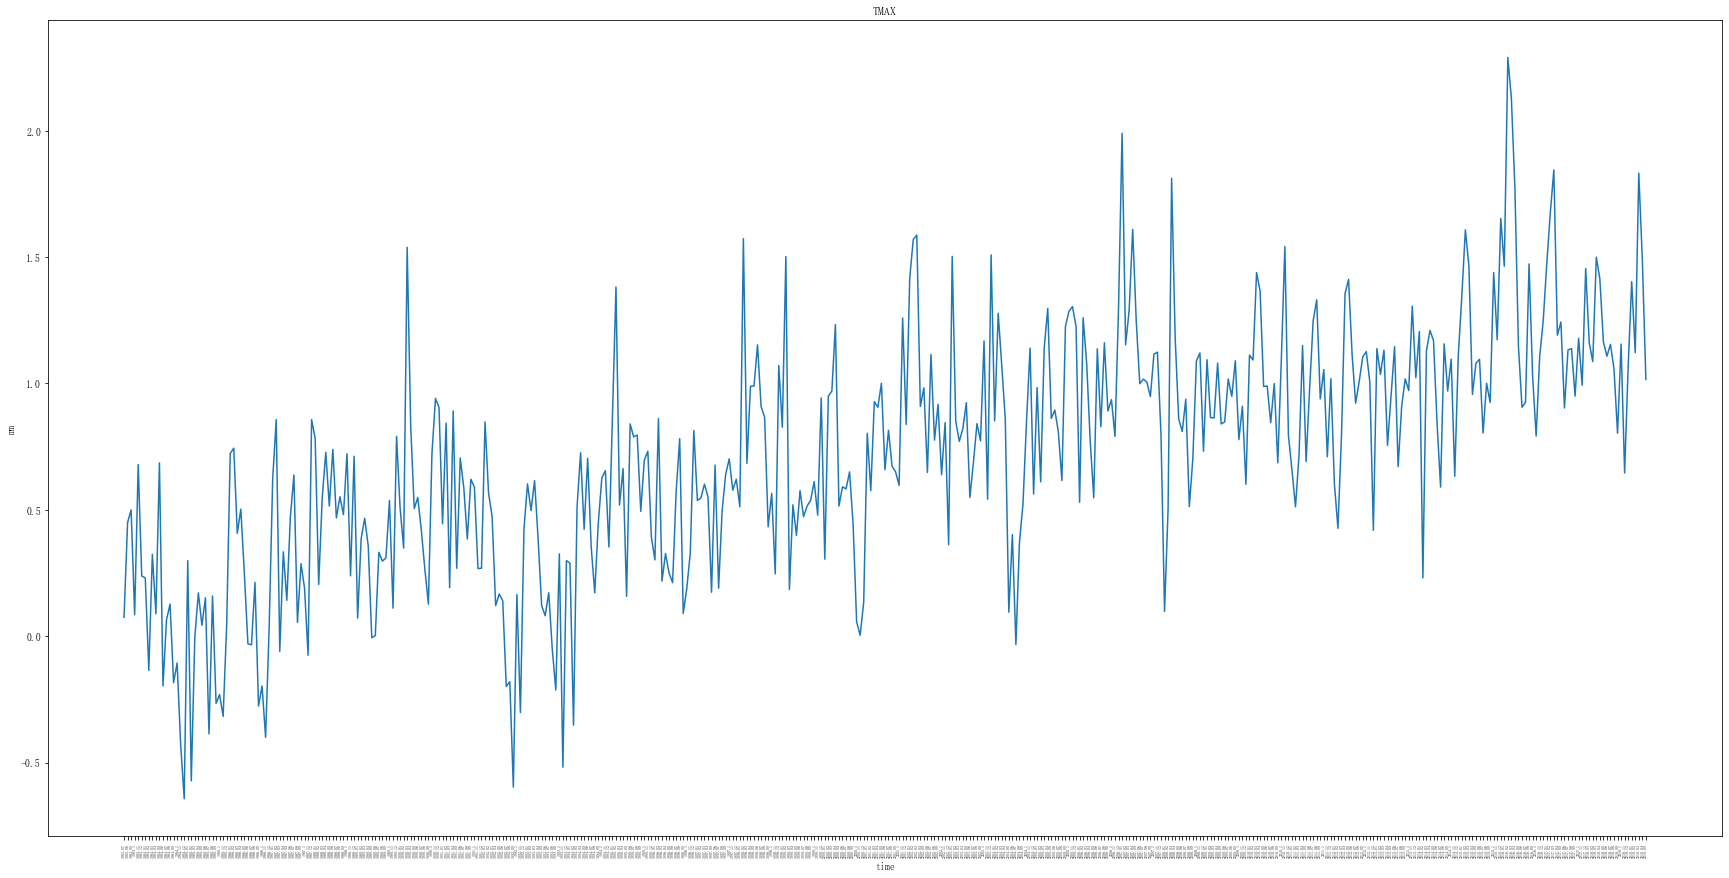

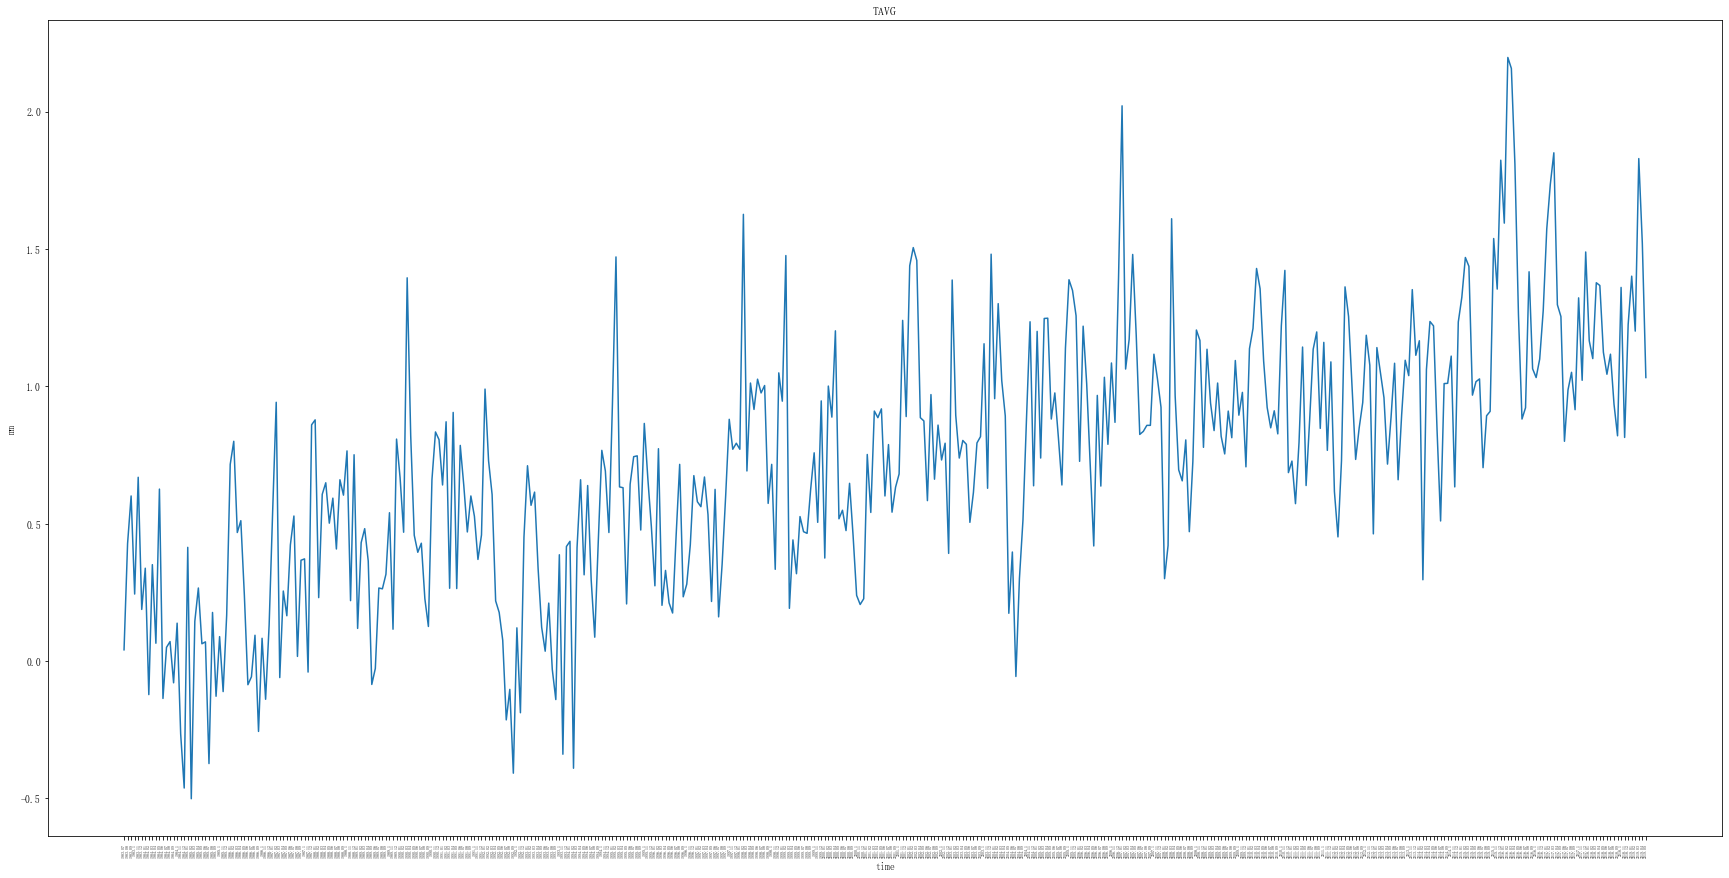

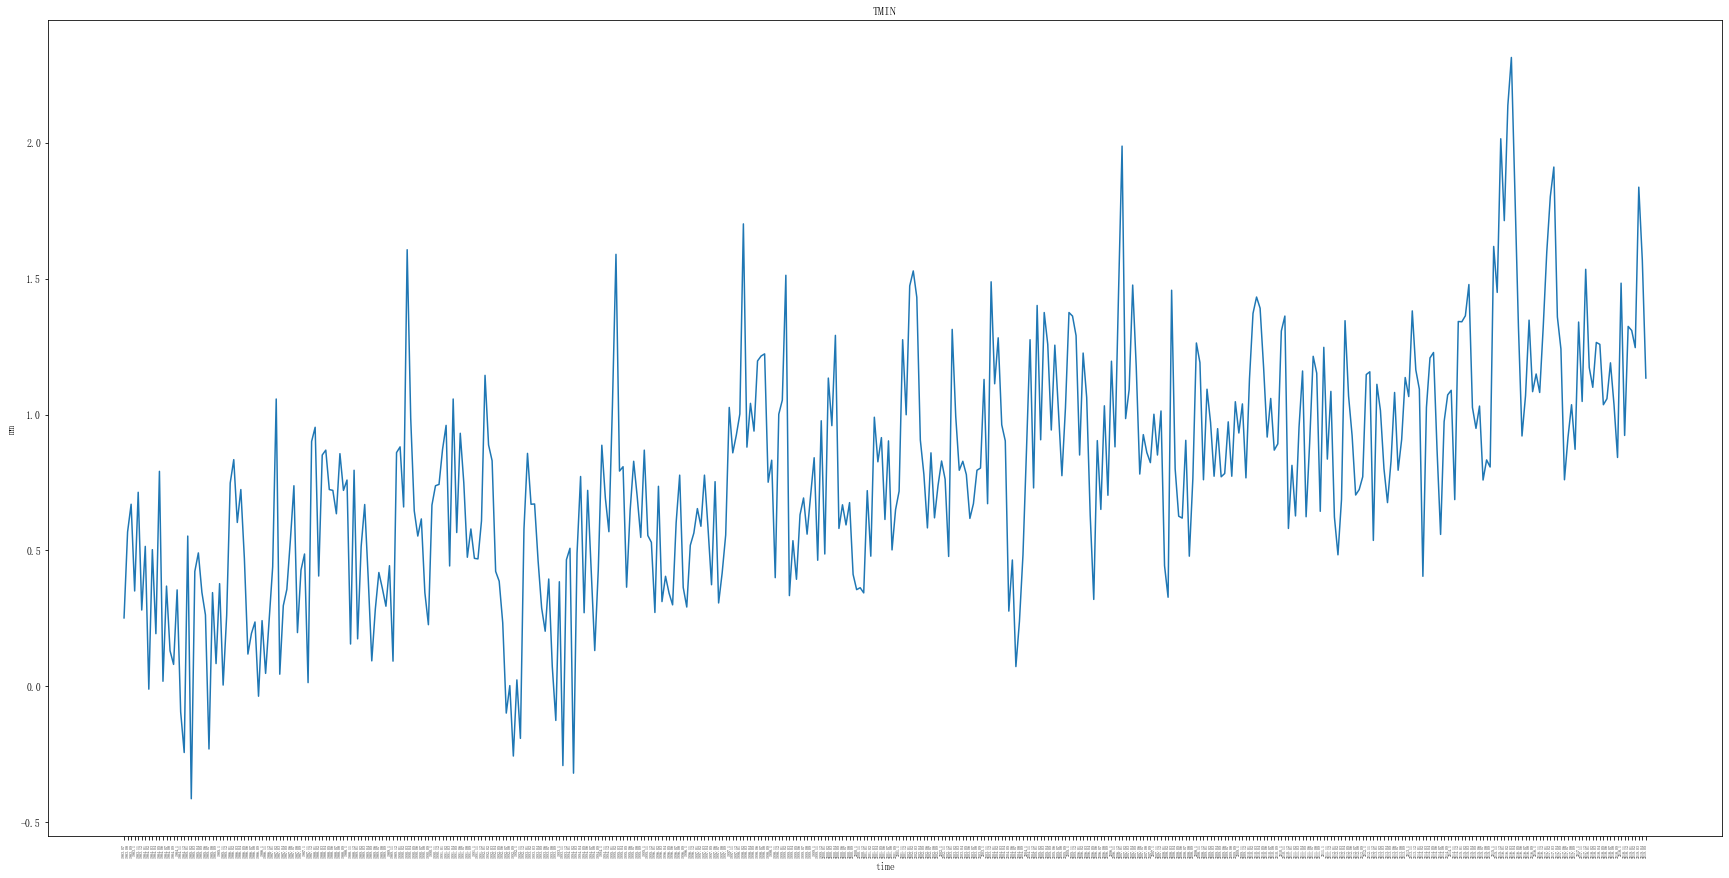

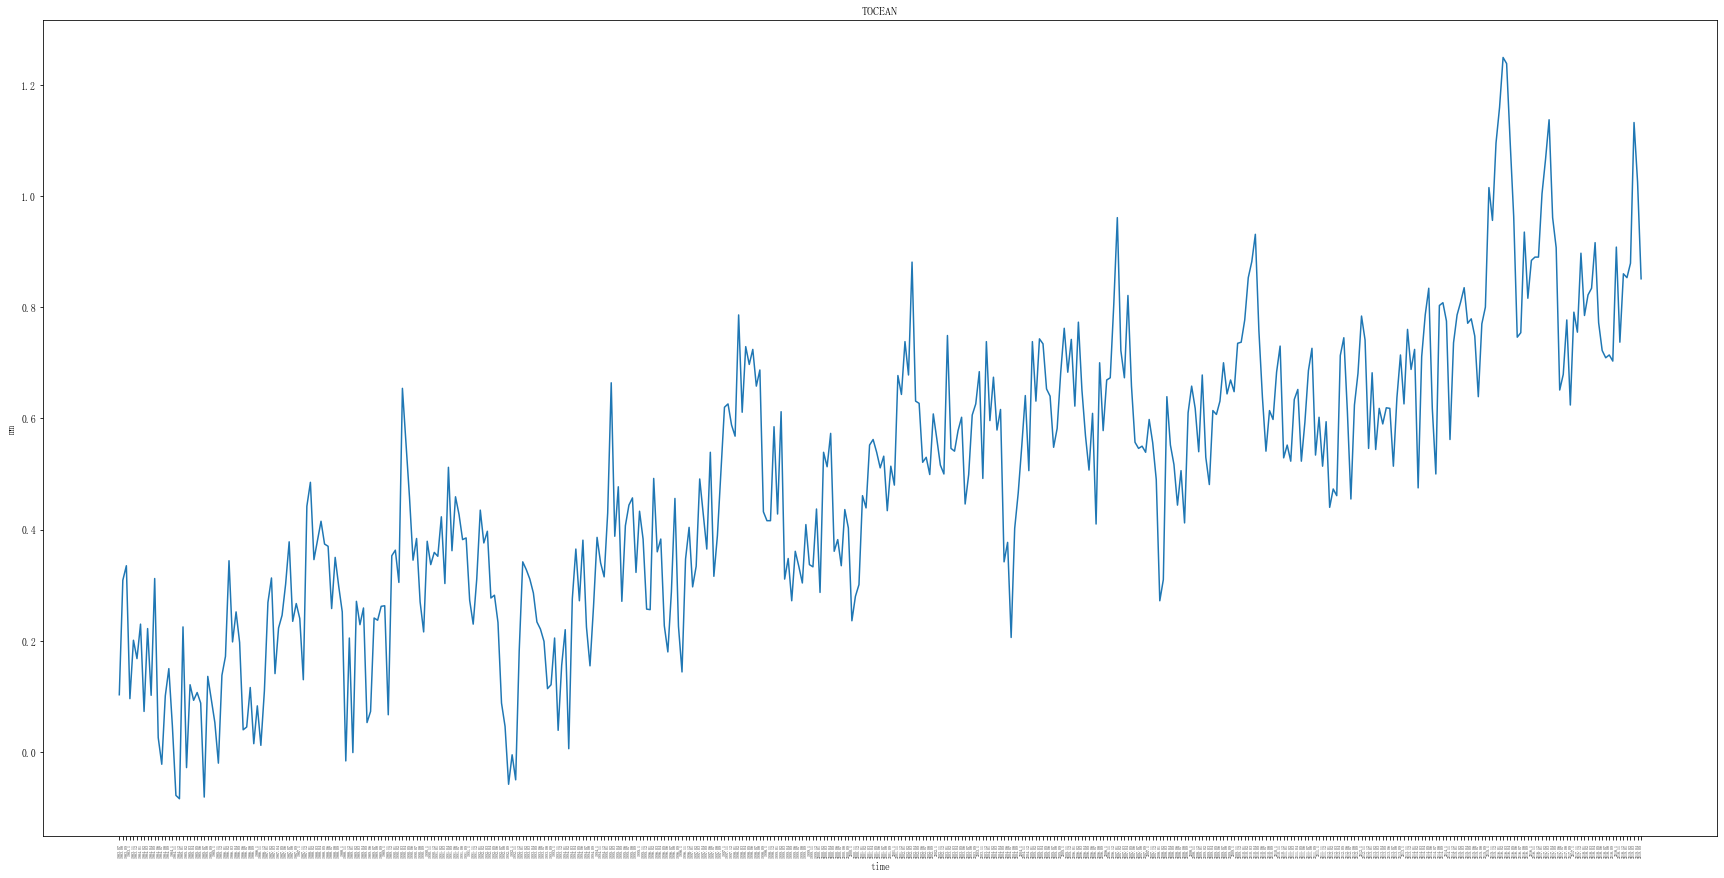

In [1]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# load dataset
dataset = read_csv('data.csv', header=0)
# print(dataset.values[:,0])

# month=dataset.values[:,0]
month=list(map(str,dataset.values[:,0]))
# print(month)
# print(type(month[0]))
values = dataset.values

# specify columns to plot
groups = list(range(1,len(dataset.columns)))
i = 1
# plot each column

start = datetime.datetime(1983, 7, 1)
end = datetime.datetime(2019, 5, 1)
# 设置日期的间隔为1
delta = datetime.timedelta(days=30.4)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
# print(dates)

for group in groups:
    
    fig= pyplot.figure(figsize = (30,15))
#     pyplot.subplot(len(groups)*2, 1, i)
    pyplot.plot(month,values[:, group])
    pyplot.title(dataset.columns[group], loc='center')
    
    pyplot.xlabel("time")
    pyplot.ylabel("mm")
    pyplot.xticks(rotation=90,fontsize=4)
    # 第一个参数是值，第二个参数是对应的显示效果(若无传入则默认直接显示原始数据)，第三个参数是标签旋转角度


    # 获取当前的坐标
#     ax = pyplot.gca()
#     for label in ax.get_xticklabels():
#         label.set_visible(False)
#     for label in ax.get_xticklabels()[::20]:
#         label.set_visible(True)

    # 设置日期的显示格式
#     date_format = mpl.dates.DateFormatter("%Y-%m-%d")
#     ax.xaxis.set_major_formatter(date_format)

    #日期的排列根据图像的大小自适应
#     fig.autofmt_xdate()
    #     i += 2
    pyplot.savefig("{}量".format(dataset.columns[group]),dpi=240)
#     pyplot.show()

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# 转换序列成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in=1, n_out=1,y_columns=[0],dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[y_columns].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in y_columns]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 加载数据集
dataset = read_csv('data.csv', header=0)
values = dataset.values[:,1:]
feature=values.shape[1]

# print(values)
# # 整数编码
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1,2,3,4))
scaled = scaler.fit_transform(values)
# scaled=values

# 构建监督学习问题
n_in=24
reframed = series_to_supervised(scaled, n_in, 1,y_columns=list(range(feature)))
print(reframed.head(5))
# 分割为训练集和测试集
values = reframed.values

n_train_hours = 300
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分为输入输出
train_X, train_y = train[:, :-feature], train[:, -feature:]
print(-values.shape[1])
test_X, test_y = test[:, :-feature], test[:, -feature:]
# 重塑成3D形状 [样例, 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Using TensorFlow backend.


    var1(t-24)  var2(t-24)  var3(t-24)  var4(t-24)  var5(t-24)  var6(t-24)  \
24    0.051675    0.000000    0.244801    0.200890    0.243947    0.140285   
25    0.025838    0.009155    0.372656    0.344329    0.359868    0.294824   
26    0.000000    0.052018    0.389703    0.408451    0.397285    0.314329   
27    0.000404    0.078236    0.248210    0.276130    0.280264    0.135034   
28    0.016687    0.069496    0.450733    0.433655    0.413426    0.213803   

    var1(t-23)  var2(t-23)  var3(t-23)  var4(t-23)  ...  var3(t-1)  var4(t-1)  \
24    0.025838    0.009155    0.372656    0.344329  ...   0.271054   0.211638   
25    0.000000    0.052018    0.389703    0.408451  ...   0.087624   0.047443   
26    0.000404    0.078236    0.248210    0.276130  ...   0.273440   0.251297   
27    0.016687    0.069496    0.450733    0.433655  ...   0.128537   0.138251   
28    0.036334    0.056596    0.300375    0.255374  ...   0.140471   0.218681   

    var5(t-1)  var6(t-1)   var1(t)   var2(t)

In [3]:
# 设计网络
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(30))
model.add(Dense(5))
model.compile(loss='mae', optimizer='adam')
# 拟合神经网络模型
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# 绘制训练测试误差图
fig= pyplot.figure(figsize = (30,15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('训练误差图.png')
pyplot.show()


Instructions for updating:
Colocations handled automatically by placer.


ValueError: Error when checking target: expected dense_2 to have shape (5,) but got array with shape (6,)

In [ ]:
# 做出预测
yhat = model.predict(test_X)

test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# 反向转换预测值比例
# inv_yhat = concatenate((yhat, test_X1[:, 1:]), axis=1)

# inv_yhat = concatenate((yhat, test_X1[:, 2:]), axis=1)
inv_yhat=yhat
inv_yhat = scaler.inverse_transform(inv_yhat)
print(inv_yhat.shape)
# inv_yhat = inv_yhat[:,0]
# 反向转换实际值比例
test_y1 = test_y.reshape((len(test_y), len(groups)))
# inv_y = concatenate((test_y1, test_X1[:, 2:]), axis=1)
inv_y=test_y1
inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]


In [ ]:
# 绘制历史数据和预测数据图
plt.plot(inv_yhat[1:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:-1,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


plt.plot(inv_yhat[:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


In [ ]:
# 绘制历史数据和预测数据图
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
for i in groups:
    rmse = sqrt(mean_squared_error(inv_yhat[:,i-1], inv_y[:,i-1]))
    print('Test RMSE: %.3f' % rmse)

    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_yhat[:,i-1],label='预测',c='b',linestyle='-', marker='*')
    plt.plot(inv_y[:,i-1],label="真实",c='r')
    plt.legend()
    plt.title('{} 2008/08-2019/05'.format(dataset.columns[i]))
    plt.savefig('{}预测模型检验.png'.format(dataset.columns[i]))
    plt.show()
    # 计算RMSE





In [ ]:
#预测未来25年
alltime=12*25
# test_25=test_X[-1:,:]
# print(test_25)

pred_x=test_y[-n_in:,:].reshape(1,1,n_in*feature)
print(pred_x.shape)
import copy

# print(pred_y[-1,:].shape)
pred_y=np.zeros((1,feature))
for i in range(alltime):
    tmp=model.predict(pred_x)
    pred_x[0,0,:-feature]=pred_x[0,0,feature:]
    pred_x[0,0,-feature:]=copy.deepcopy(tmp[0,:])
#     print(pred_y.shape,tmp.shape)
    pred_y=np.vstack((pred_y,copy.deepcopy(tmp)))
pred_y=pred_y[1:,:]
print(pred_y.shape)
print(pred_y)
    

#     pre=pre.reshape(1,1,(pre.shape[-1]))
#     pred_y=np.vstack((pred_y,pre))
    

In [ ]:


inv_pred_y = scaler.inverse_transform(pred_y)

for i in groups:
    # 绘制历史数据和预测数据图
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_pred_y[:,i-1],label='预测',c='b',linestyle='-', marker='*')
    plt.legend()
    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]))
    plt.savefig('{}未来25年预测.png'.format(dataset.columns[i]))
    plt.show()
    # 计算RMSE
